KNN Classifier
Number of samples loaded: 373
X shape: (373, 7)
y shape: (373,)
Accuracy: 0.6533333333333333
Confusion Matrix:
[[20  3  8]
 [ 4 17  5]
 [ 6  0 12]]
Classification Report:
              precision    recall  f1-score   support

     Neutral       0.67      0.65      0.66        31
       Smile       0.85      0.65      0.74        26
       Anger       0.48      0.67      0.56        18

    accuracy                           0.65        75
   macro avg       0.67      0.66      0.65        75
weighted avg       0.69      0.65      0.66        75



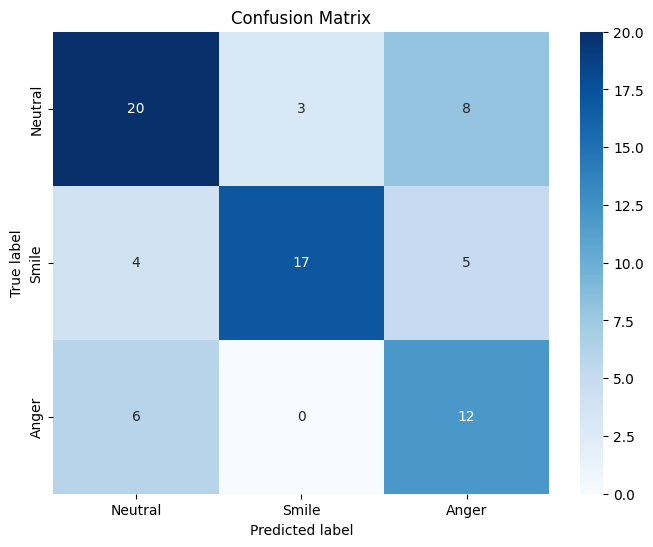

In [43]:
# KNN CLASSIFIER

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def extract_features(filepath):
    points = []
    with open(filepath) as f:
        for line in f.readlines():
            try:
                points.append(list(map(float, line.split())))
            except ValueError:
                continue
    
    p = np.array(points)
    features = [max(euclidean_distance(p[0], p[1]), euclidean_distance(p[3], p[4])) / euclidean_distance(p[7], p[12]),
                euclidean_distance((p[0] + p[1])/2, (p[3] + p[4])/2) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[14], p[15]) / euclidean_distance(p[19], p[20]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[16], p[17]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[19], p[20]),
                max(euclidean_distance(p[3], p[4]), euclidean_distance(p[5], p[6])) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[9], p[18]) / euclidean_distance(p[19], p[20])]
    
    return features

def load_dataset(data_dir):
    X, y = [], []
    if not os.path.exists(data_dir):
        return np.array(X), np.array(y)
    
    for subdir, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".pts"):
                filepath = os.path.join(subdir, file)
                label = int(file.split('-')[2].split('.')[0])
                if label in [1, 2, 3]:
                    features = extract_features(filepath)
                    if features:
                        X.append(features)
                        y.append(label)
    
    return np.array(X), np.array(y)

data_dir = r'E:\Ghost A4\Programming\FREE LANCING PROJECTS\FACIAL EXPRESSION IDENTIFIER\points_22'
X, y = load_dataset(data_dir)

print('\033[1m' + 'KNN Classifier' + '\033[2m')
print(f"Number of samples loaded: {len(X)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if len(X) == 0 or len(y) == 0:
    print("Error: No data was loaded.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=14)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Neutral', 'Smile', 'Anger'])

    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['Neutral', 'Smile', 'Anger'], yticklabels=['Neutral', 'Smile', 'Anger'])
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Number of samples loaded: 373
X shape: (373, 7)
y shape: (373,)
Epoch 1/150
19/19 [==============================] - 2s 4ms/step - loss: 1.1023 - accuracy: 0.3826
Epoch 2/150
19/19 [==============================] - 0s 4ms/step - loss: 1.0843 - accuracy: 0.3926
Epoch 3/150
19/19 [==============================] - 0s 4ms/step - loss: 1.0804 - accuracy: 0.4128
Epoch 4/150
19/19 [==============================] - 0s 4ms/step - loss: 1.0969 - accuracy: 0.4094
Epoch 5/150
19/19 [==============================] - 0s 4ms/step - loss: 1.0569 - accuracy: 0.5067
Epoch 6/150
19/19 [==============================] - 0s 3ms/step - loss: 1.0487 - accuracy: 0.4430
Epoch 7/150
19/19 [==============================] - 0s 3ms/step - loss: 1.0426 - accuracy: 0.4329
Epoch 8/150
19/19 [==============================] - 0s 4ms/step - loss: 1.0196 - accuracy: 0.5000
Epoch 9/150
19/19 [==============================] - 0s 4ms/step - loss: 1.0007 - accuracy: 0.4899
Epoch 10/150
19/19 [=========================

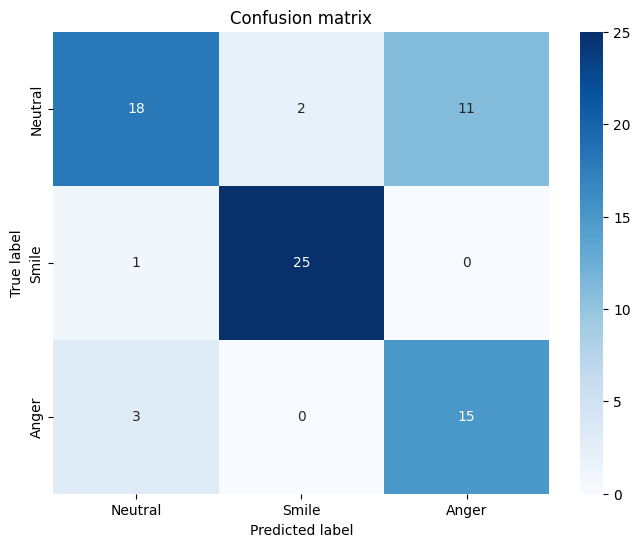

In [58]:
#ANN CLASSIFIER

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def extract_features(filepath):
    points = []
    with open(filepath) as f:
        for line in f.readlines():
            try:
                points.append(list(map(float, line.split())))
            except ValueError:
                continue
    
    p = np.array(points)
    features = [max(euclidean_distance(p[0], p[1]), euclidean_distance(p[3], p[4])) / euclidean_distance(p[7], p[12]),
                euclidean_distance((p[0] + p[1])/2, (p[3] + p[4])/2) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[14], p[15]) / euclidean_distance(p[19], p[20]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[16], p[17]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[19], p[20]),
                max(euclidean_distance(p[3], p[4]), euclidean_distance(p[5], p[6])) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[9], p[18]) / euclidean_distance(p[19], p[20])]
    
    return features

def load_dataset(data_dir):
    X, y = [], []
    if not os.path.exists(data_dir):
        return np.array(X), np.array(y)
    
    for subdir, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".pts"):
                filepath = os.path.join(subdir, file)
                label = int(file.split('-')[2].split('.')[0])
                
                if label in [1, 2, 3]:
                    features = extract_features(filepath)
                    if features:
                        X.append(features)
                        y.append(label)
    
    return np.array(X), np.array(y)

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

data_dir = r'E:\Ghost A4\Programming\FREE LANCING PROJECTS\FACIAL EXPRESSION IDENTIFIER\points_22'
X, y = load_dataset(data_dir)

print(f"Number of samples loaded: {len(X)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if len(X) == 0 or len(y) == 0:
    print("Error: No data was loaded.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train_encoded, epochs=150, batch_size=16, verbose=1)

    loss, accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
    print(f'Accuracy: {accuracy}')

    y_pred = np.argmax(model.predict(X_test), axis=-1)

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred, target_names=['Neutral', 'Smile', 'Anger'])

    print('\n\n\033[1m' + 'Artificial Neural Network (ANN) Classifier' + '\033[2m \n\n')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(report)

    plot_confusion_matrix(conf_matrix, classes=['Neutral', 'Smile', 'Anger'])


Naive Bayes Classifier
Number of samples loaded: 373
X shape: (373, 7)
y shape: (373,)
Confusion Matrix:
[[17  7  7]
 [ 0 22  4]
 [ 7  1 10]]
Classification Report:
              precision    recall  f1-score   support

     Neutral       0.71      0.55      0.62        31
       Smile       0.73      0.85      0.79        26
       Anger       0.48      0.56      0.51        18

    accuracy                           0.65        75
   macro avg       0.64      0.65      0.64        75
weighted avg       0.66      0.65      0.65        75

Accuracy: 0.6533333333333333


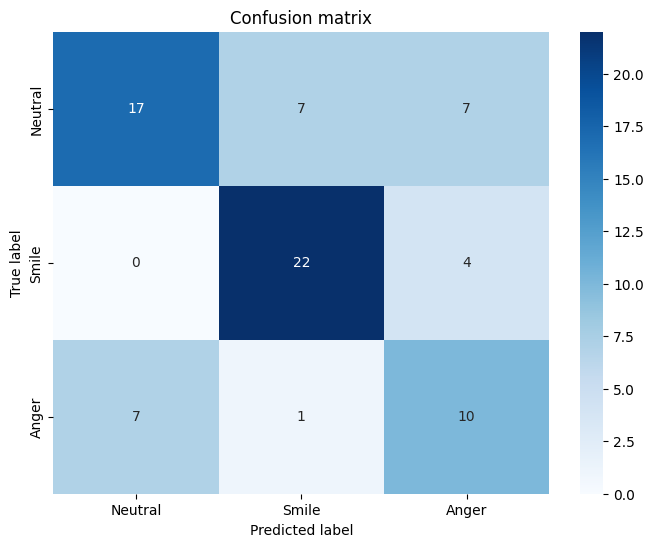

In [41]:
# NAIVE BAYSE CLASSIFIER
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def extract_features(filepath):
    points = []
    with open(filepath) as f:
        for line in f.readlines():
            try:
                points.append(list(map(float, line.split())))
            except ValueError:
                continue
    
    p = np.array(points)
    features = [max(euclidean_distance(p[0], p[1]), euclidean_distance(p[3], p[4])) / euclidean_distance(p[7], p[12]),
                euclidean_distance((p[0] + p[1])/2, (p[3] + p[4])/2) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[14], p[15]) / euclidean_distance(p[19], p[20]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[16], p[17]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[19], p[20]),
                max(euclidean_distance(p[3], p[4]), euclidean_distance(p[5], p[6])) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[9], p[18]) / euclidean_distance(p[19], p[20])]
    
    return features

def load_dataset(data_dir):
    X, y = [], []
    if not os.path.exists(data_dir):
        return np.array(X), np.array(y)
    
    for subdir, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".pts"):
                filepath = os.path.join(subdir, file)
                label = int(file.split('-')[2].split('.')[0])
                
                if label in [1, 2, 3]:
                    features = extract_features(filepath)
                    if features:
                        X.append(features)
                        y.append(label)
    
    return np.array(X), np.array(y)

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

data_dir = r'E:\Ghost A4\Programming\FREE LANCING PROJECTS\FACIAL EXPRESSION IDENTIFIER\points_22'
X, y = load_dataset(data_dir)

print('\033[1m' + 'Naive Bayes Classifier' + '\033[2m')
print(f"Number of samples loaded: {len(X)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if len(X) == 0 or len(y) == 0:
    print("Error: No data was loaded.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)

    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, y_train_encoded)

    y_pred = nb_classifier.predict(X_test)

    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    report = classification_report(y_test_encoded, y_pred, target_names=['Neutral', 'Smile', 'Anger'])

    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(report)

    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f'Accuracy: {accuracy}')

    plot_confusion_matrix(conf_matrix, classes=['Neutral', 'Smile', 'Anger'])


Decision Tree Classifier
Number of samples loaded: 373
X shape: (373, 7)
y shape: (373,)
Accuracy: 0.56
Confusion Matrix:
[[13  5 13]
 [ 0 18  8]
 [ 6  1 11]]
Classification Report:
              precision    recall  f1-score   support

     Neutral       0.68      0.42      0.52        31
       Smile       0.75      0.69      0.72        26
       Anger       0.34      0.61      0.44        18

    accuracy                           0.56        75
   macro avg       0.59      0.57      0.56        75
weighted avg       0.63      0.56      0.57        75



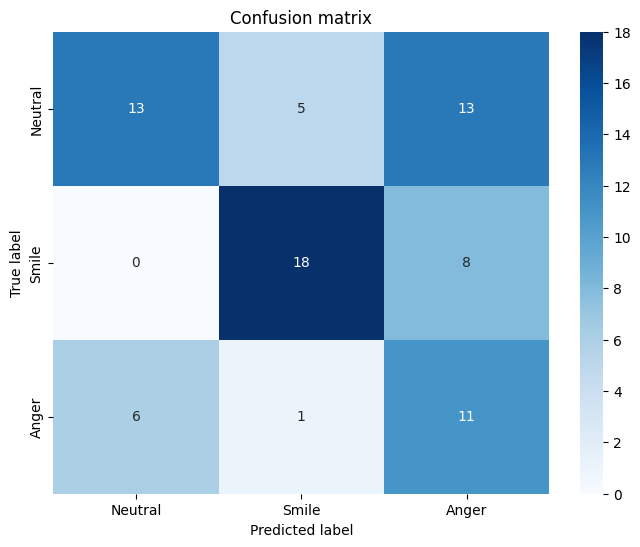

In [40]:
#DECISION TREE CLASSIFIER
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def extract_features(filepath):
    points = []
    with open(filepath) as f:
        for line in f.readlines():
            try:
                points.append(list(map(float, line.split())))
            except ValueError:
                continue
    
    p = np.array(points)
    features = [max(euclidean_distance(p[0], p[1]), euclidean_distance(p[3], p[4])) / euclidean_distance(p[7], p[12]),
                euclidean_distance((p[0] + p[1])/2, (p[3] + p[4])/2) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[14], p[15]) / euclidean_distance(p[19], p[20]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[16], p[17]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[19], p[20]),
                max(euclidean_distance(p[3], p[4]), euclidean_distance(p[5], p[6])) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[9], p[18]) / euclidean_distance(p[19], p[20])]
    
    return features

def load_dataset(data_dir):
    X, y = [], []
    if not os.path.exists(data_dir):
        return np.array(X), np.array(y)
    
    for subdir, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".pts"):
                filepath = os.path.join(subdir, file)
                label = int(file.split('-')[2].split('.')[0])
                
                if label in [1, 2, 3]:
                    features = extract_features(filepath)
                    if features:
                        X.append(features)
                        y.append(label)
    
    return np.array(X), np.array(y)

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

data_dir = r'E:\Ghost A4\Programming\FREE LANCING PROJECTS\FACIAL EXPRESSION IDENTIFIER\points_22'
X, y = load_dataset(data_dir)

print('\033[1m' + 'Decision Tree Classifier' + '\033[2m')
print(f"Number of samples loaded: {len(X)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if len(X) == 0 or len(y) == 0:
    print("Error: No data was loaded.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    dt_classifier = DecisionTreeClassifier(random_state=42)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Neutral', 'Smile', 'Anger'])

    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(report)

    plot_confusion_matrix(conf_matrix, classes=['Neutral', 'Smile', 'Anger'])


SVM Classifier
Number of samples loaded: 373
X shape: (373, 7)
y shape: (373,)
Accuracy: 0.7466666666666667
Confusion Matrix:
[[17  2 12]
 [ 1 25  0]
 [ 4  0 14]]
Classification Report:
              precision    recall  f1-score   support

     Neutral       0.77      0.55      0.64        31
       Smile       0.93      0.96      0.94        26
       Anger       0.54      0.78      0.64        18

    accuracy                           0.75        75
   macro avg       0.75      0.76      0.74        75
weighted avg       0.77      0.75      0.74        75



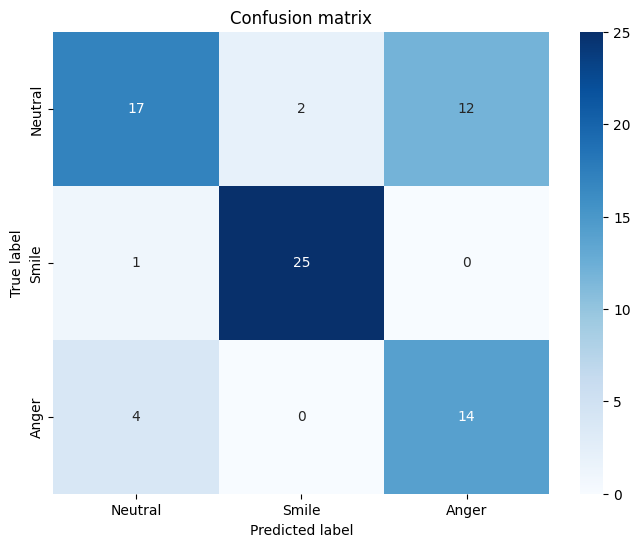

In [39]:
#SVM CLASSIFIER
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def extract_features(filepath):
    points = []
    with open(filepath) as f:
        for line in f.readlines():
            try:
                points.append(list(map(float, line.split())))
            except ValueError:
                continue
    
    p = np.array(points)
    features = [max(euclidean_distance(p[0], p[1]), euclidean_distance(p[3], p[4])) / euclidean_distance(p[7], p[12]),
                euclidean_distance((p[0] + p[1])/2, (p[3] + p[4])/2) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[14], p[15]) / euclidean_distance(p[19], p[20]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[16], p[17]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[19], p[20]),
                max(euclidean_distance(p[3], p[4]), euclidean_distance(p[5], p[6])) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[9], p[18]) / euclidean_distance(p[19], p[20])]
    
    return features

def load_dataset(data_dir):
    X, y = [], []
    if not os.path.exists(data_dir):
        return np.array(X), np.array(y)
    
    for subdir, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".pts"):
                filepath = os.path.join(subdir, file)
                label = int(file.split('-')[2].split('.')[0])
                
                if label in [1, 2, 3]:
                    features = extract_features(filepath)
                    if features:
                        X.append(features)
                        y.append(label)
    
    return np.array(X), np.array(y)

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

data_dir = r'E:\Ghost A4\Programming\FREE LANCING PROJECTS\FACIAL EXPRESSION IDENTIFIER\points_22'
X, y = load_dataset(data_dir)

print('\033[1m' + 'SVM Classifier' + '\033[2m')
print(f"Number of samples loaded: {len(X)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if len(X) == 0 or len(y) == 0:
    print("Error: No data was loaded.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    svm_classifier = SVC(kernel='linear', random_state=42)
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Neutral', 'Smile', 'Anger'])

    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(report)

    plot_confusion_matrix(conf_matrix, classes=['Neutral', 'Smile', 'Anger'])


Random Forest Classifier
Number of samples loaded: 373
X shape: (373, 7)
y shape: (373,)
Accuracy: 0.68
Confusion Matrix:
[[16  5 10]
 [ 1 23  2]
 [ 6  0 12]]
Classification Report:
              precision    recall  f1-score   support

     Neutral       0.70      0.52      0.59        31
       Smile       0.82      0.88      0.85        26
       Anger       0.50      0.67      0.57        18

    accuracy                           0.68        75
   macro avg       0.67      0.69      0.67        75
weighted avg       0.69      0.68      0.68        75



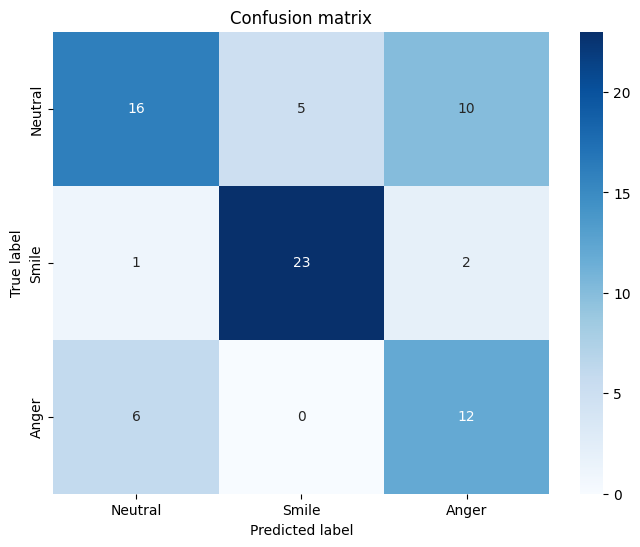

In [37]:
# RANDOM FOREST CLASSIFIER
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def extract_features(filepath):
    points = []
    with open(filepath) as f:
        for line in f.readlines():
            try:
                points.append(list(map(float, line.split())))
            except ValueError:
                continue
    
    p = np.array(points)
    features = [max(euclidean_distance(p[0], p[1]), euclidean_distance(p[3], p[4])) / euclidean_distance(p[7], p[12]),
                euclidean_distance((p[0] + p[1])/2, (p[3] + p[4])/2) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[14], p[15]) / euclidean_distance(p[19], p[20]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[16], p[17]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[19], p[20]),
                max(euclidean_distance(p[3], p[4]), euclidean_distance(p[5], p[6])) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[9], p[18]) / euclidean_distance(p[19], p[20])]
    
    return features

def load_dataset(data_dir):
    X, y = [], []
    if not os.path.exists(data_dir):
        return np.array(X), np.array(y)
    
    for subdir, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".pts"):
                filepath = os.path.join(subdir, file)
                label = int(file.split('-')[2].split('.')[0])
                
                if label in [1, 2, 3]:
                    features = extract_features(filepath)
                    if features:
                        X.append(features)
                        y.append(label)
    
    return np.array(X), np.array(y)

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

data_dir = r'E:\Ghost A4\Programming\FREE LANCING PROJECTS\FACIAL EXPRESSION IDENTIFIER\points_22'
X, y = load_dataset(data_dir)

print('\033[1m' + 'Random Forest Classifier' + '\033[2m')
print(f"Number of samples loaded: {len(X)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if len(X) == 0 or len(y) == 0:
    print("Error: No data was loaded.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Neutral', 'Smile', 'Anger'])

    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(report)

    plot_confusion_matrix(conf_matrix, classes=['Neutral', 'Smile', 'Anger'])


Logistic Regression
Number of samples loaded: 373
X shape: (373, 7)
y shape: (373,)
Accuracy: 0.76
Confusion Matrix:
[[18  2 11]
 [ 1 25  0]
 [ 4  0 14]]
Classification Report:
              precision    recall  f1-score   support

     Neutral       0.78      0.58      0.67        31
       Smile       0.93      0.96      0.94        26
       Anger       0.56      0.78      0.65        18

    accuracy                           0.76        75
   macro avg       0.76      0.77      0.75        75
weighted avg       0.78      0.76      0.76        75



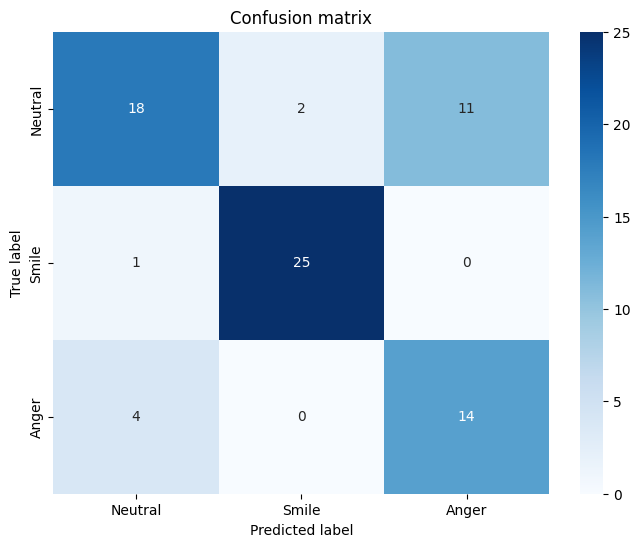

In [36]:
# REGRESSION BASED CLASSIFICATION
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def extract_features(filepath):
    points = []
    with open(filepath) as f:
        for line in f.readlines():
            try:
                points.append(list(map(float, line.split())))
            except ValueError:
                continue
    
    p = np.array(points)
    features = [max(euclidean_distance(p[0], p[1]), euclidean_distance(p[3], p[4])) / euclidean_distance(p[7], p[12]),
                euclidean_distance((p[0] + p[1])/2, (p[3] + p[4])/2) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[14], p[15]) / euclidean_distance(p[19], p[20]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[16], p[17]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[19], p[20]),
                max(euclidean_distance(p[3], p[4]), euclidean_distance(p[5], p[6])) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[9], p[18]) / euclidean_distance(p[19], p[20])]
    
    return features

def load_dataset(data_dir):
    X, y = [], []
    if not os.path.exists(data_dir):
        return np.array(X), np.array(y)
    
    for subdir, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".pts"):
                filepath = os.path.join(subdir, file)
                label = int(file.split('-')[2].split('.')[0])
                
                if label in [1, 2, 3]:
                    features = extract_features(filepath)
                    if features:
                        X.append(features)
                        y.append(label)
    
    return np.array(X), np.array(y)

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

data_dir = r'E:\Ghost A4\Programming\FREE LANCING PROJECTS\FACIAL EXPRESSION IDENTIFIER\points_22'
X, y = load_dataset(data_dir)

print('\033[1m' + 'Logistic Regression' + '\033[2m')
print(f"Number of samples loaded: {len(X)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if len(X) == 0 or len(y) == 0:
    print("Error: No data was loaded.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    accuracy = model.score(X_test, y_test)
    print(f'Accuracy: {accuracy}')

    y_pred = model.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Neutral', 'Smile', 'Anger'])

    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(report)

    plot_confusion_matrix(conf_matrix, classes=['Neutral', 'Smile', 'Anger'])


KNN Classifier
Number of samples loaded: 373
X shape: (373, 7)
y shape: (373,)
Accuracy: 0.6533333333333333
Confusion Matrix:
[[20  3  8]
 [ 4 17  5]
 [ 6  0 12]]
Classification Report:
              precision    recall  f1-score   support

     Neutral       0.67      0.65      0.66        31
       Smile       0.85      0.65      0.74        26
       Anger       0.48      0.67      0.56        18

    accuracy                           0.65        75
   macro avg       0.67      0.66      0.65        75
weighted avg       0.69      0.65      0.66        75



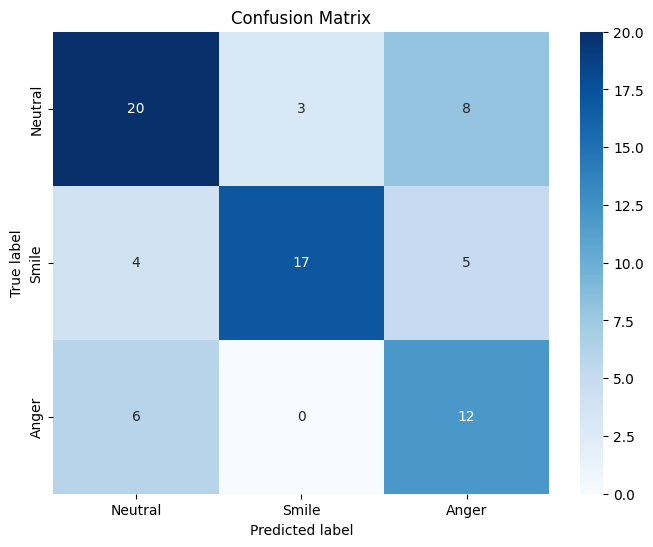

Artificial Neural Network (ANN) Classifier 


Number of samples loaded: 373
X shape: (373, 7)
y shape: (373,)
Epoch 1/50
15/15 - 2s - loss: 1.3288 - accuracy: 0.2857 - val_loss: 1.1258 - val_accuracy: 0.3167 - 2s/epoch - 108ms/step
Epoch 2/50
15/15 - 0s - loss: 1.0647 - accuracy: 0.4160 - val_loss: 1.1321 - val_accuracy: 0.3167 - 122ms/epoch - 8ms/step
Epoch 3/50
15/15 - 0s - loss: 1.0533 - accuracy: 0.4328 - val_loss: 1.0928 - val_accuracy: 0.3000 - 123ms/epoch - 8ms/step
Epoch 4/50
15/15 - 0s - loss: 1.0373 - accuracy: 0.4286 - val_loss: 1.1045 - val_accuracy: 0.3167 - 122ms/epoch - 8ms/step
Epoch 5/50
15/15 - 0s - loss: 1.0356 - accuracy: 0.4202 - val_loss: 1.0944 - val_accuracy: 0.3000 - 112ms/epoch - 7ms/step
Epoch 6/50
15/15 - 0s - loss: 1.0344 - accuracy: 0.4706 - val_loss: 1.0960 - val_accuracy: 0.3167 - 128ms/epoch - 9ms/step
Epoch 7/50
15/15 - 0s - loss: 1.0327 - accuracy: 0.4412 - val_loss: 1.0854 - val_accuracy: 0.3333 - 126ms/epoch - 8ms/step
Epoch 8/50
15/15 - 0s - loss: 

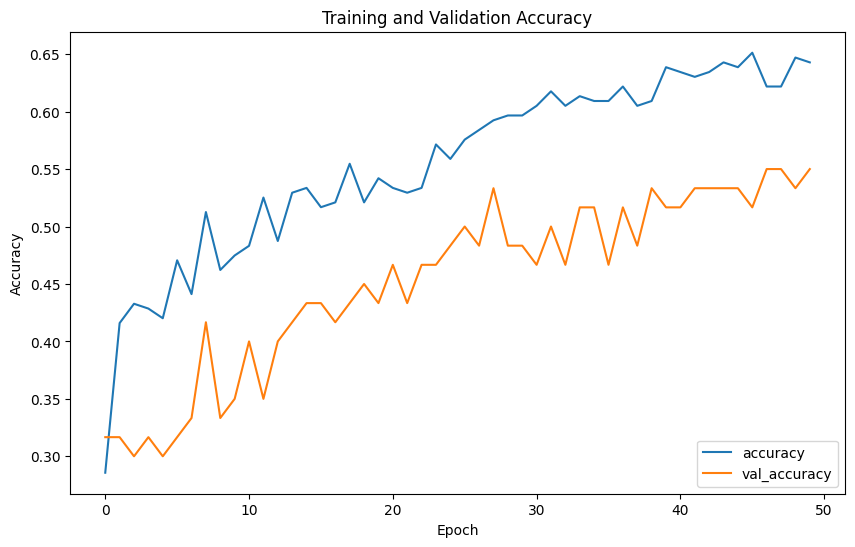

In [59]:
# Merged Code
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Common Functions
def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def extract_features(filepath):
    points = []
    with open(filepath) as f:
        for line in f.readlines():
            try:
                points.append(list(map(float, line.split())))
            except ValueError:
                continue
    
    p = np.array(points)
    features = [max(euclidean_distance(p[0], p[1]), euclidean_distance(p[3], p[4])) / euclidean_distance(p[7], p[12]),
                euclidean_distance((p[0] + p[1])/2, (p[3] + p[4])/2) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[14], p[15]) / euclidean_distance(p[19], p[20]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[16], p[17]),
                euclidean_distance(p[1], p[2]) / euclidean_distance(p[19], p[20]),
                max(euclidean_distance(p[3], p[4]), euclidean_distance(p[5], p[6])) / euclidean_distance(p[7], p[12]),
                euclidean_distance(p[9], p[18]) / euclidean_distance(p[19], p[20])]
    
    return features

def load_dataset(data_dir):
    X, y = [], []
    if not os.path.exists(data_dir):
        return np.array(X), np.array(y)
    
    for subdir, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith(".pts"):
                filepath = os.path.join(subdir, file)
                label = int(file.split('-')[2].split('.')[0])
                if label in [1, 2, 3]:
                    features = extract_features(filepath)
                    if features:
                        X.append(features)
                        y.append(label)
    
    return np.array(X), np.array(y)

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Load Dataset
data_dir = r'E:\Ghost A4\Programming\FREE LANCING PROJECTS\FACIAL EXPRESSION IDENTIFIER\points_22'
X, y = load_dataset(data_dir)

# KNN Classifier
print('\033[1m' + 'KNN Classifier' + '\033[2m')
print(f"Number of samples loaded: {len(X)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

if len(X) == 0 or len(y) == 0:
    print("Error: No data was loaded.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    knn = KNeighborsClassifier(n_neighbors=14)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Neutral', 'Smile', 'Anger'])

    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=plt.cm.Blues, xticklabels=['Neutral', 'Smile', 'Anger'], yticklabels=['Neutral', 'Smile', 'Anger'])
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# ANN Classifier (Artificial Neural Network)
print('\033[1m' + 'Artificial Neural Network (ANN) Classifier' + '\033[2m \n\n')
print(f"Number of samples loaded: {len(X)}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=2)

# Evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc}')

# Plotting training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()